# Logistic regression

In [1]:
import pandas as pd
import numpy as np

### Step 1 Reading Data

In [2]:
df = pd.read_csv(r"./Data/BreastCancer.csv")
df.head()

,Unnamed: 0,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,1,1000025,5,1,1,1,2,1.0,3,1,1,benign
1,2,1002945,5,4,4,5,7,10.0,3,2,1,benign
2,3,1015425,3,1,1,1,2,2.0,3,1,1,benign
3,4,1016277,6,8,8,1,3,4.0,3,7,1,benign
4,5,1017023,4,1,1,3,2,1.0,3,1,1,benign


### Problem Statement 
- to predict if a person has breast cancer or not with the help of above features

In [4]:
### Removing unwanted columns
df = df.drop(columns=['Unnamed: 0', 'Id'])
df.head()

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,benign
1,5,4,4,5,7,10.0,3,2,1,benign
2,3,1,1,1,2,2.0,3,1,1,benign
3,6,8,8,1,3,4.0,3,7,1,benign
4,4,1,1,3,2,1.0,3,1,1,benign


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Cl.thickness     699 non-null    int64  
 1   Cell.size        699 non-null    int64  
 2   Cell.shape       699 non-null    int64  
 3   Marg.adhesion    699 non-null    int64  
 4   Epith.c.size     699 non-null    int64  
 5   Bare.nuclei      683 non-null    float64
 6   Bl.cromatin      699 non-null    int64  
 7   Normal.nucleoli  699 non-null    int64  
 8   Mitoses          699 non-null    int64  
 9   Class            699 non-null    object 
dtypes: float64(1), int64(8), object(1)
memory usage: 54.7+ KB


In [6]:
df.describe()

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses
count,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


### Step 2 prepeocessing

In [7]:
# checking for null values
df.isnull().sum()

Cl.thickness        0
Cell.size           0
Cell.shape          0
Marg.adhesion       0
Epith.c.size        0
Bare.nuclei        16
Bl.cromatin         0
Normal.nucleoli     0
Mitoses             0
Class               0
dtype: int64

In [8]:
# Bare nuclei has 16 null values
# filling nulls with mean as it is an numeric column

df["Bare.nuclei"] = df['Bare.nuclei'].fillna(df['Bare.nuclei'].mean())

In [9]:
# filled null values
df.isnull().sum()

Cl.thickness       0
Cell.size          0
Cell.shape         0
Marg.adhesion      0
Epith.c.size       0
Bare.nuclei        0
Bl.cromatin        0
Normal.nucleoli    0
Mitoses            0
Class              0
dtype: int64

### EDA

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\rushi\AppData\Local\Temp\ipykernel_11160\454959698.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), fmt='.2f', annot=True, cmap='coolwarm');


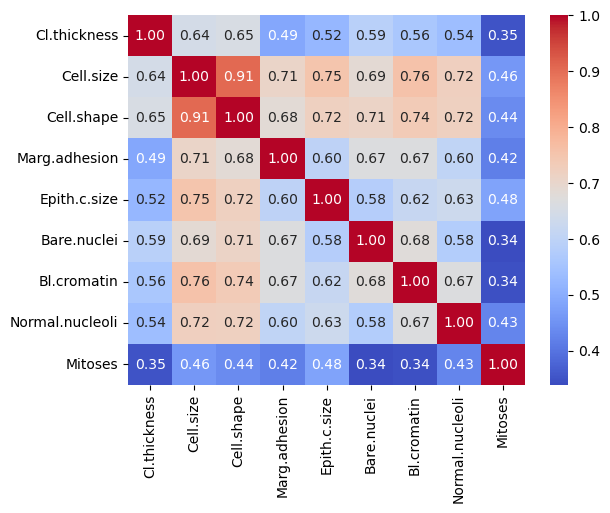

In [12]:
sns.heatmap(df.corr(), fmt='.2f', annot=True, cmap='coolwarm');

- As we can see there is high correlation betwwen cell size and cell shape

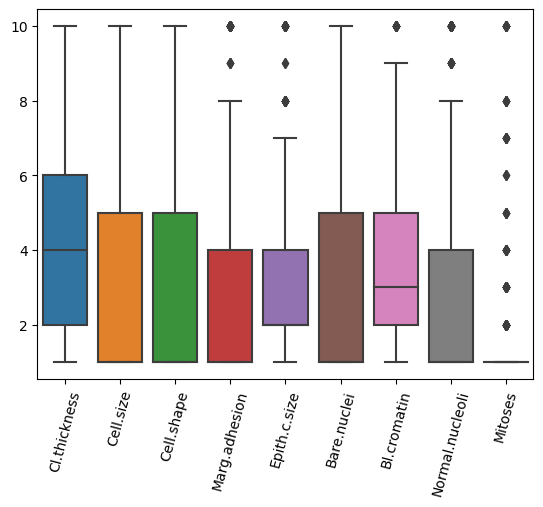

In [16]:
sns.boxplot(df);
plt.xticks(rotation=75);

- There are many outliers to be found in mitsoses on the higher side.

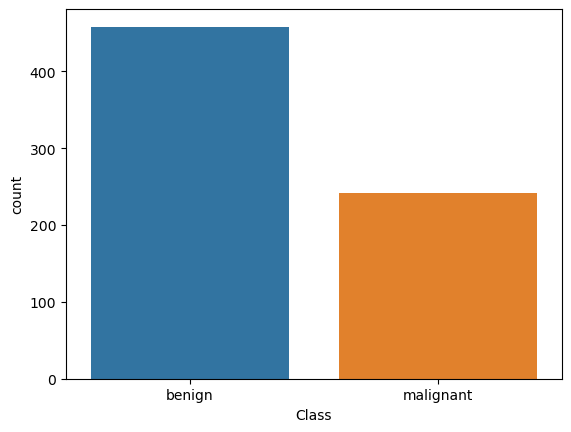

In [17]:
sns.countplot(data=df, x='Class');

- we can see there is a class imbalance.

In [18]:
df['Class'].value_counts()

benign       458
malignant    241
Name: Class, dtype: int64

In [19]:
# converting class to numeric column
df['Class'] = df['Class'].replace({'benign':0, 'malignant':1})

### Step 3 Data sampling 

In [20]:
from sklearn.model_selection import train_test_split

x = df.iloc[:,0:-1]
y = df.iloc[: , -1]

tr_x, ts_x, tr_y, ts_y = train_test_split(x, y, test_size=.2)

tr_x.shape, tr_y.shape, ts_x.shape, ts_y.shape

((559, 9), (559,), (140, 9), (140,))

### step 4 Model building

In [21]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(tr_x, tr_y)

LogisticRegression()

In [22]:
pred = logreg.predict(ts_x)

### Step 5 Model evaluation

In [23]:
from sklearn.metrics import classification_report

In [25]:
print(classification_report(ts_y, pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97        79
           1       0.95      0.97      0.96        61

    accuracy                           0.96       140
   macro avg       0.96      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140



- model is performing very good in terms of accuracy, precision and recall.